# 9. Problema de máxima diversidad

Implementar en Python un algoritmo evolutivo para el problema de máxima diversidad, tal y como se define en https://grafo.etsii.urjc.es/optsicom/mdp.html. Comparar las dos siguientes versiones del algoritmo para el manejo de las restricciones:

– **AE1: External feasibility first** (Tema 2, pág. 78). Dado que solo hay una restricción, las versiones max y sum de feasibility first externo descritas en el Tema 2 de la asignatura son equivalentes. El problema es de maximización, por lo que se transformará a un problema de minimización. La función objetivo resultante es la siguiente:

$\min F(x) = \begin{cases} 
-\sum\limits_{i=1}^{n-1} \sum\limits_{j=i+1}^{n} d_{ij} x_i x_j & \text{si } \sum\limits_{i=1}^n x_i = 0 \\
\lvert \sum\limits_{i=1}^n x_i - m \rvert & \text{en otro caso}
\end{cases}$

– **AE2: Algoritmo de reparo** (Tema 2, pág. 76).

– **AE3 (añadido): Algoritmo con representación permutacional**: Se aprovecha la representación permutacional para que todos los individuos sean factibles. Cada individuo se representa por una permutación $[p_1, ..., p_n]$. Se seleccionan los primeros $m$ individuos de la permutación ($x_{p_i}=1 \, \forall i \le m$).

Para las comparaciones, generar aleatoriamente 3 problemas de test con las siguientes características:

– **Problema de test 1**: $ n = 100, m = 10, K = 1, s_{ij} ∈ [0, 10]$.

– **Problema de test 2**: $ n = 150, m = 15, K = 1, s_{ij} ∈ [0, 10]$.

– **Problema de test 3**: $ n = 200, m = 20, K = 1, s_{ij} ∈ [0, 10]$.


Se realizará ajuste de parámetros con una **grid search** configurada de la
siguiente forma:

- Algoritmos evolutivos (proyectos 1 a 7, 9 y 10): grid search de 10x10, 3 repeticiones, probabilidad de cruce en el intervalo (0.0, 1.0], y probabilidad de mutación en el intervalo (0.0, 0.3], 100000 evaluaciones de la función objetivo en los proyectos 1 a 7, y 3000 evaluaciones en proyectos 9 y 10. En el proyecto 5, los operadores de mutación polinomial y “small” se aplican uno u otro con probabilidad 0.5.

Una vez identificados los valores de los parámetros, se realizarán **10 runs** con esos parámetros y diferentes semillas, con 300000 evaluaciones en los proyectos 1 a 8, y 10000 evaluaciones en los proyectos 9 y 10.

- Se reportará media, máximo, mínimo y desviación estándar para cada problema y algoritmo.

- Se realizará un ranking wins-losses de los resultados medios y de las diferencias estadísticamente significativas (Wilcoxon rank-sum test).

- Se entregará un documento Jupyter Notebook en Python con el código, comentarios, resultados, visualización gráfica de la evolución de los algoritmos (las 10 runs sobre el mismo gráfico), análisis y discusión de resultados y conclusiones.

## 1. El problema de la máxima diversidad

El problema de la máxima diversidad consiste en escoger un subconjunto de $m$ puntos de una nube de $n$ puntos (es decir, un conjunto de puntos con una distancia entre ellos) de forma que se maximice la suma de las distancias entre cada par de puntos del subconjunto elegido. Consideraremos una nube de $n$ puntos  $\{s_i\}_{i=1}^n \subset [L, U]^K$ con la distancia euclídea: 

$$d_{ij} = d(s_i, s_j) = \sqrt{\sum\limits_{k=1}^K (s_{ik}-s_{jk})^2}$$

El problema se puede formular como un problema de optimización cuadrático con variables binarias:

$$\begin{align*}\text{Maximizar } & \sum\limits_{i=1}^{n-1} \sum\limits_{j=i+1}^{n} d_{ij} x_i x_j \\ \text{Sujeto a } & \sum\limits_{i=1}^n x_i = m, \\ & x_i \in \{0, 1\} \quad \forall i=1, ..., n \end{align*}$$

## 2. Algoritmos evolutivos utilizados

En todos los casos transformaremos el problema a un problema de minimización y aplicaremos algoritmos evolutivos. Además, todos los algoritmos comparten los siguientes elementos:

- Estrategia de reemplazo generacional $\mu + \lambda$ con $\mu = \lambda = 1$. Por tanto, todos los algoritmos serán elitistas.
- Selección por torneo binario.

Utilizaremos los siguientes algoritmos, con los siguientes componentes:

**AE1: External feasibility first** (Tema 2, pág. 78):

- Representación binaria: Cada inididuo se representa por $x = (x_i)_{i=1}^n \in \{0, 1\}^n$.
- Manejo de restricciones con enfoque feasibility first descrito anteriormente. El problema se transforma a un problema de minimización y la función objetivo se transforma a:
  $$\min F(x) = \begin{cases} -\sum\limits_{i=1}^{n-1} \sum\limits_{j=i+1}^{n} d_{ij} x_i x_j & \text{si } \sum\limits_{i=1}^n x_i = 0 \\\lvert \sum\limits_{i=1}^n x_i - m \rvert &\text{en otro caso} \end{cases}$$
- Selección por torneo binario. Muestreo estocástico con reemplazamiento.
- Cruce simple.
- Mutación bit-flip.
- Estrategia de reemplazo generacional $\mu + \lambda$ con $\mu = \lambda = 1$.


**AE2: Algoritmo de reparo** (Tema 2, pág. 76).

- Representación binaria.
- Manejo de restricciones con algoritmo de reparo. Las soluciones no factibles se reparan con el siguiente algoritmo de reparo:

    IF $\sum\limits_{i=1}^n x_i < m$ THEN seleccionar aleatoriamente $p = 1, ..., n$ tal que $x_p = 0$ y asignar $x_p \leftarrow 1$

    ELSE IF $\sum\limits_{i=1}^n x_i > m$ THEN seleccionar aleatoriamente $p = 1, ..., n$ tal que $x_p = 1$ y asignar $x_p \leftarrow 0$

- Selección por torneo binario. Muestreo estocástico con reemplazamiento.
- Cruce simple.
- Mutación bit-flip.
- Estrategia de reemplazo generacional $\mu + \lambda$ con $\mu = \lambda = 1$.


**AE3 (añadido): Algoritmo con representación permutacional**: Se aprovecha la representación permutacional para que todos los individuos sean factibles. 

- Representación permutacional: Cada individuo se representa por una permutación $[p_1, ..., p_n]$. Se seleccionan los primeros $m$ individuos de la permutación ($x_{p_i}=1 \, \forall i \le m$).
- Manejo de restricciones: no es necesario, ya que el espacio de búsqueda solo contiene individuos factibles.
- Selección por torneo binario. Muestreo estocástico con reemplazamiento.
- Cruce PMX.
- Mutación por intercambio recíproco.
- Estrategia de reemplazo generacional $\mu + \lambda$ con $\mu = \lambda = 1$.


### Parámetros del algoritmo evolutivo
- $G$: Número de generaciones. El número de evaluaciones será $2GN$.
- $N$: Tamaño de la población
- $random\_state$: Semilla para reproducibilidad
- $prob$: Probabilidades
  - $p\_c$: Probabilidad de cruce.
  - $p\_m$: Probabilidades de mutación.


## 3. Implementación de los algoritmos evolutivos para el problema de máxima diversidad

### Requerimientos

A continuación se importan las librerías de _Python_ necesarias, se establece la semilla de _Numpy_ para la reproducibilidad y se definen la ruta del directorio donde se guardarán los resultados y algunas variables que se pueden utilizar para hacer pruebas de menor tamaño o utilizar los resultados ya guardados.

In [1]:
import numpy as np
import heapq 
from tqdm import tqdm
import matplotlib.pyplot as plt
import landscapes.single_objective as lso
from scipy.spatial import distance_matrix
import os
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu
from statistics import mean

profiling = True # Poner a True para hacer profiling
results_dir = 'cbio_p9_results' if not profiling else 'cbio_p9_results_profiling' # Directorio de resultados
done = os.path.isdir(results_dir) # Poner a False para ejecutar las pruebas
np.random.seed(0)   # Establecer semilla

### Definición del problema de optimización con restricciones (Máxima diversidad)
- $n$: Número de instancias del dataset (puntos de la nube de puntos).
- $k$: Dimensionalidad de la nube de puntos.
- $L$: Límite inferior de espacio muestral del dataset. 
- $U$: Límite superior de espacio muestral del dataset. Los puntos del dataset serán $s_i \in [L, U]^k \quad \forall i = 1, ..., n$.
- $f$: Función objetivo (máxima diversidad).
- $maxf$:  Máximo (aproximado) de la función $f$, en este caso 0.

Hemos implementado una clase _diversity_problem_ que representa un problema de máxima diversidad.

In [2]:
# Problema de máxima diversidad

def diversity_obj(x, d):
    """
    Función objetivo del problema de máxima diversidad.
    x: representación binaria de un individuo. 
    d: matriz de distancias del dataset.
    """
    return -(x.T @ d @ x) # Cambiamos el signo para transformar el problema en uno de minimización

def maxDiversity_constraints(x, m):
    return np.array([np.abs(np.sum(x)-m)])

class diversity_problem:
    def __init__(self, n, m, k=1, L=0, U=10):
        self.n = n
        self.m = m
        self.k = k
        self.L = L
        self.U = U
        self.X = np.random.uniform(L, U, (n, k))     # Dataset de n puntos en [L, U]
        #if k==1:
        #    self.X = np.sort(self.X, axis=0)        # Ordena los puntos de menor a mayor
        
        self.d = np.triu(distance_matrix(self.X, self.X))   # Matriz de distancias de los puntos del dataset (n x n)
                                                            # Extraemos la parte triangular superior para evitar sumar distancias repetidas
                                                            
        self.f = lambda x: diversity_obj(x, self.d)  # Función objetivo
        self.g = lambda x: maxDiversity_constraints(x, m) # Restricciones
        self.maxf = 0

### Transformación del problema con restricciones en un problema sin restricciones – versión max

In [3]:
def transformed_problem(x,f,g,maxf):
    maxg = max(g(x))
    if maxg <= 0.0:
        return f(x)
    else:
        return maxf+maxg

### Definición de individuo

In [4]:
class Individuo:
    def __init__(self,n):
        self.x = np.zeros(n, dtype=int)
        self.f = 0.0
    def __lt__(self, ind):
        return self.f < ind.f

### Inicialización de la población

In [5]:
def InitializePopulation(P):
    for I in P:
        I.x[:] = np.random.randint(2, size=len(I.x))

def InitializePopulationPermutation(P):
    for I in P:
        I.x[:] = np.random.permutation(len(I.x))

### Funciones de evaluación

In [6]:
def evaluate_EFF(I,f, g, maxf):           
    I.f = transformed_problem(I.x,f,g,maxf)

def perm2bin(x, m):
    """
    Devuelve la representación binaria de un individuo representado mediante una permutación.
    x: permutación.
    m: los primeros m elementos de la permutación se ponen a 1's.
    """
    n = len(x)
    y = np.zeros(n, dtype=int)
    y[x[:m]] = 1
    return y

def evaluate_permutation(I, problem):
    I.f = problem.f(perm2bin(I.x, problem.m))

### Copia de individuo

In [7]:
def copia(I1, I2):
    """
        Copia I2 en I1
    """
    np.copyto(I1.x, I2.x)
    I1.f = I2.f

### Selección

Solo utilizaremos el operador de selección por torneo binario.

In [8]:
def binary_tournament_selection(P):
    return min(np.random.choice(P,2,replace=False))

### Cruce

In [9]:
def uniform_crossover(x1,x2):
    for l in range(x1.size):
        if np.random.random()<=0.5:
            x1[l], x2[l] = x2[l], x1[l] 
            
def simple_crossover(x1,x2):
    pos = np.random.randint(x1.size)
    x1[:], x2[:] = np.hstack((x1[:pos],x2[pos:])), np.hstack((x2[:pos],x1[pos:]))
        
def crossover(x1,x2,prob_cross): # Cruce simple
    if np.random.random()<=prob_cross:
        simple_crossover(x1,x2)

aux_mem = np.arange(10) # Memoria auxiliar para PMX para evitar reservar memoria en cada llamada

def pmx(x1, x2):
    global aux_mem
    if aux_mem.size != x1.size:
        aux_mem = np.arange(x1.size, dtype=int)
    else:
        for i in range(x1.size):
            aux_mem[i] = i
    pos1 = np.random.randint(x1.size)
    pos2 = np.random.randint(x1.size)
    if pos1 > pos2:
        pos1, pos2 = pos2, pos1
    for i in range(pos1, pos2):
        aux_mem[x1[i]] = x2[i]
        aux_mem[x2[i]] = x1[i]
    x1[pos1:pos2], x2[pos1:pos2] = x2[pos1:pos2], x1[pos1:pos2]
    x1[:pos1] = aux_mem[x1[:pos1]]
    x2[:pos1] = aux_mem[x2[:pos1]]
    x1[pos2:] = aux_mem[x1[pos2:]]
    x2[pos2:] = aux_mem[x2[pos2:]]

def pmx_crossover(x1, x2, prob_cross):
    if np.random.random()<=prob_cross:
        pmx(x1,x2)

### Mutación

Definimos los siguientes operadores de mutación:

- Mutación bitflip: para la representación binaria.

- Mutación por intercambio recíproco: para la representación permutacional.

In [10]:
def bitflip_mutation(x,p_m):
    for l in range(x.size):
        if np.random.random()<=p_m:
            x[l] = 1-x[l]

def mutation(x,prob_mutation):
    bitflip_mutation(x, prob_mutation)

def exchange_mutation(x, prob_mutation):
    if np.random.random()<=prob_mutation:
        pos1 = np.random.randint(x.size)
        pos2 = np.random.randint(x.size)
        x[pos1], x[pos2] = x[pos2], x[pos1]

### Algoritmo de reparo

In [11]:
def maxDiversity_repair(x, m):
    """
    Reparación de la solución x para cumplir las restricciones del problema de máxima diversidad. Se realiza inplace.
    x: representación binaria de un individuo. 
    m: número de elementos a seleccionar.
    """
    v = np.sum(x)
    if v != m:
        if v > m:
            # Eliminar elemento
            x[np.random.choice(np.where(x == 1)[0], size=v-m, replace=False)] = 0
        else:
            # Añadir un elemento
            x[np.random.choice(np.where(x == 0)[0], size=m-v, replace=False)] = 1

def repair_and_evaluate(I, m, f):
    """
    Repara el individuo I si no cumple las restricciones y evalúa su función objetivo.
    """
    maxDiversity_repair(I.x, m)
    I.f = f(I.x)

### Progreso del algoritmo

In [12]:
def IniciaProgreso(P,G, feasibility, problem):
    best_outputs_f = [0]*(G+1) # Para visualizar la gráfica de evolución al final    
    best_outputs_g = [0]*(G+1) # Para visualizar la gráfica de evolución al final    
    progression_bar = tqdm()
    ActualizaProgreso(P,0,best_outputs_f,best_outputs_g,progression_bar, feasibility, problem)    
    return best_outputs_f,best_outputs_g,progression_bar
    
def ActualizaProgreso(P,gen,best_outputs_f,best_outputs_g,progression_bar, feasibility, problem):
    best_individuo = min(P)
    best_g = feasibility(best_individuo, problem)
    progression_bar.set_description("Generation: %s Objective: %s Feasibility: %s " % (str(gen), str(best_individuo.f), str(best_g)))
    best_outputs_f[gen] = best_individuo.f # Añadir mejor fitness (para visualización)
    best_outputs_g[gen] = best_g
    progression_bar.update(1)

### Algoritmo evolutivo

La clase _EAOperators_ encapsula los operadores de un algoritmo evolutivo: inicialización de la población, evaluación, selección, cruce, mutación, factibilidad. De esta forma la función EA ejecuta una instancia de algoritmo evolutivo y gracias a un parámetro de tipo _EAOperators_ se pueden ejecutar distintos tipos algoritmos evolutivos (como AE1, AE2 y AE3) con una misma función.

In [13]:
class EAOperators:
    """
    Clase que encapsula los operadores de un algoritmo evolutivo.
    """
    def __init__(self, initialize_population, evaluate, select, cross, mutate, feasibility):
        """
        initialize_population: función de inicialización de la población. initialize_population(P:List[Individuo]).
        evaluate(I:Individuo): función de evaluación de un individuo. evaluate(I:Individuo, problem: diversity_problem).
        select: operador de selección de padres. select(P:List[Individuo]) -> Individuo.
        cross: operador de cruce. cross(x1:np.array, x2:np.array, prob_cross:float).
        mutate: operador de mutación. mutate(I:Individuo, prob_mutation:float).
        feasibility: función g que evalúa la factibilidad de un individuo. feasibility(I: Individuo, problem: diversity_problem) -> double.
        """
        self.initialize_population = initialize_population
        self.evaluate = evaluate
        self.select = select
        self.cross = cross
        self.mutate = mutate
        self.feasibility = feasibility

def EA(G,N,prob,problem,ops,random_state):
    """
    Algoritmo evolutivo para el problema de máxima diversidad con representación binaria y manejo de restricciones por External Feasibility First.
    G: número de generaciones.
    N: tamaño de la población.
    ops: operadores del algoritmo evolutivo (EAOperators).
    random_state: semilla para la generación de números aleatorios.
    """
    np.random.seed(random_state)
    
    p_c, p_m = prob
    initialize_population = ops.initialize_population
    evaluate = ops.evaluate
    select = ops.select
    cross = ops.cross
    mutate = ops.mutate

    # Aserciones
    
    assert G >= 1, "El número de evaluaciones debe ser mayor o igual que 1."  
    assert N >= 2 and not N % 2, "El tamaño de la población debe ser par y mayor que 1."  
    
    def AssertProbability(p):
        assert p>=0 and p<=1, "La probabilidad debe estar entre 0 y 1."

    AssertProbability(p_c)
    
    AssertProbability(p_m)
    
    # Parámetros del problema
    n = problem.n

    # Crear población inicial con N individuos
    P = [Individuo(n) for _ in range(N)]
    initialize_population(P)
    
    # Evaluar población inicial
    for I in P:
        evaluate(I,problem)
    
    # Crear población auxilar 
    Q = [Individuo(n) for _ in range(2*N)]
    
    # Evoluciona durante G generaciones
    best_outputs_f,best_outputs_g,progression_bar = IniciaProgreso(P,G, feasibility, problem)    
    for gen in range(1,G+1):
        for i in range(N):
            copia(Q[i],P[i])
        i=N
        while i < 2*N:
            copia(Q[i],select(P))
            copia(Q[i+1],select(P))
            cross(Q[i].x,Q[i+1].x,p_c)
            mutate(Q[i].x,p_m)
            mutate(Q[i+1].x,p_m)
            evaluate(Q[i],problem)
            evaluate(Q[i+1],problem)
            i += 2  
        R = heapq.nsmallest(N,Q)
        for i in range(N):
            copia(P[i],R[i])
        ActualizaProgreso(P,gen,best_outputs_f,best_outputs_g,progression_bar, feasibility, problem)
        # print([I.x for I in P])
    best_individuo = min(P)
    return best_outputs_f,best_outputs_g, best_individuo.f, best_individuo.x

def evaluate_AE1(I, problem):
    return evaluate_EFF(I, problem.f, problem.g, problem.maxf)

def evaluate_AE2(I, problem):
    return repair_and_evaluate(I, problem.m, problem.f)

def feasibility(I, problem):
    return max(problem.g(I.x))

def feasibility_perm(I, problem):
    return 0    # Todos los individuos representados con una permutación son factibles

ops_list = [EAOperators(InitializePopulation, evaluate_AE1, binary_tournament_selection, crossover, mutation, feasibility), 
                  EAOperators(InitializePopulation, evaluate_AE2, binary_tournament_selection, crossover, mutation, feasibility), 
                  EAOperators(InitializePopulationPermutation, evaluate_permutation, binary_tournament_selection, pmx_crossover, exchange_mutation, feasibility_perm)]

## 4. Ejecución de los experimentos

### 4.1. Definición de los problemas de test

Se generan aleatoriamente 3 problemas de test con las siguientes características:

– **Problema de test 1**: $ n = 100, m = 10, K = 1, s_{ij} ∈ [0, 10]$.

– **Problema de test 2**: $ n = 150, m = 15, K = 1, s_{ij} ∈ [0, 10]$.

– **Problema de test 3**: $ n = 200, m = 20, K = 1, s_{ij} ∈ [0, 10]$.

– **Problema de test 4 (adicional)**: $n = 200, m=20, K=7, s_{ij} \in [0, 10]$.

Cada $s_{ij}$ se toma muestreando una distribución uniforme en el intervalo $[0, 10]$. A continuación podemos ver una representación gráfica de los problemas 1, 2 y 3.

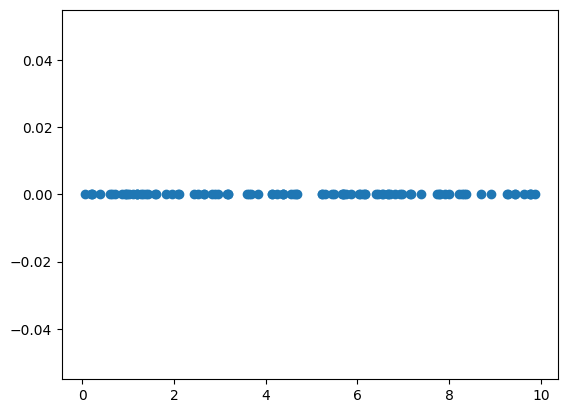

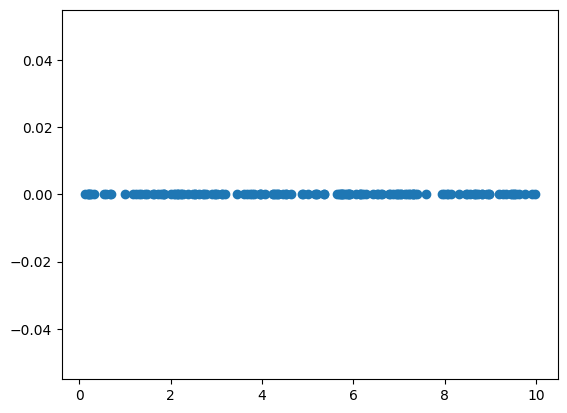

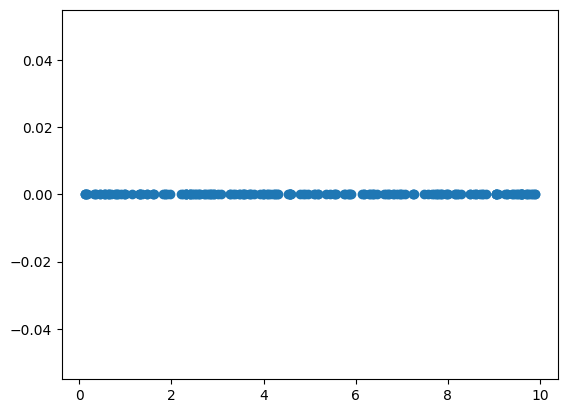

In [14]:
problems = [diversity_problem(100, 10), diversity_problem(150, 15), diversity_problem(200, 20), diversity_problem(200, 20, 7)]

for problem in problems:
    if problem.k == 1:
        plt.scatter(problem.X, np.zeros(problem.n))
        plt.show()

### 4.2. Búsqueda de parámetros mediante Grid Search

Se van a ajustar los siguientes parámetros del EA:
  - $p\_c$ (Probabilidad de cruce)
  - $p\_m$ (Probabilidad de mutación)

La búsqueda de parámetros se hará mediante grid search. Para los 3 algoritmos AE1, AE2 y AE3 y los 4 problemas de test utilizaremos el mismo grid de parámetros de tamaño $10 \times 10$:
  - $p\_c$: 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9. Hemos tomado valores en $(0, 1]$, con más valores alrededor de $0.8$.
  - $p\_m$: 1e-4,5e-4,1e-3,5e-3,0.01,0.05,0.1, 0.15, 0.2, 0.3. Hemos tomado valrores en $(0, 0.3]$ probando distintas escalas.

In [15]:
options = {'p_c': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
           'p_m': [1e-4,5e-4,1e-3,5e-3,0.01,0.05,0.1, 0.15, 0.2, 0.3]} \
        if not profiling else \
            {'p_c': [0.7, 0.8], 'p_m': [0.01, 0.05]}

In [16]:
def GridSearchEA(options, n_repeat, G, N, problem, ops):    
    best_score = float('inf')
    best_options = None
    for p_c in options['p_c']:
        for p_m in options['p_m']:
            score = np.zeros(n_repeat)
            print("p_c:",p_c," p_m:",p_m)
            for i in range(n_repeat):
                prob = p_c, p_m
                _, _, score[i], _ = EA(G, N, prob, problem, ops, random_state = i)
            scoreMean = score.mean()
            print("Score Mean: ",scoreMean)
            print("")
            if scoreMean < best_score:
                best_score = scoreMean
                best_options = {'p_c': p_c, 'p_m': p_m}
    return best_score, best_options

#### Ejecución del Grid Search

In [17]:
# Crea un directorio para guardar archivos con los resultados
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [18]:
N = 100
evals = 10000 # Aumentamos el número de evaluaciones (50 generaciones)
G = evals//(2*N) if not profiling else 30

n_repeat = 3


best_scores = []
best_options_list = []

algorithm_names = ['AE1', 'AE2', 'AE3']

if not done:
    for ops, algorithm_name in zip(ops_list, algorithm_names):
        for nproblem, problem in enumerate(problems):
            print("ALGORITMO: ", algorithm_name)
            print("PROBLEMA DE TEST ", nproblem+1)
            print("n: ", problem.n, " m: ", problem.m, " k: ", problem.k, " L: ", problem.L, " U: ", problem.U)

            best_score, best_options = GridSearchEA(options=options,n_repeat=n_repeat,G=G,N=N,problem=problem, ops=ops)

            best_scores.append(best_score)
            best_options_list.append(best_options)
            
            print("BEST:")
            print(best_score)
            print(best_options)

    df = pd.DataFrame(columns=['algorithm', 'problem', 'n', 'm', 'k', 'L', 'U', 'gs_best_score', 'best_options'])
    df['algorithm'] = [algorithm_name for algorithm_name in algorithm_names for _ in range(len(problems))]
    df['problem'] = list(range(1, len(problems)+1)) * len(algorithm_names)
    df['n'] = [problem.n for problem in problems] * len(algorithm_names)
    df['m'] = [problem.m for problem in problems] * len(algorithm_names)
    df['k'] = [problem.k for problem in problems] * len(algorithm_names)
    df['L'] = [problem.L for problem in problems] * len(algorithm_names)
    df['U'] = [problem.U for problem in problems] * len(algorithm_names)
    df['gs_best_score'] = best_scores
    df['best_options'] = best_options_list

    df.to_csv(os.path.join(results_dir, f'cbio_p9_grid_search.csv'), index=False)
else:
    df = pd.read_csv(os.path.join(results_dir, f'cbio_p9_grid_search.csv'))

In [19]:
df

,algorithm,problem,n,m,k,L,U,gs_best_score,best_options
0,AE1,1,100,10,1,0,10,-222.499626,"{'p_c': 0.7, 'p_m': 0.01}"
1,AE1,2,150,15,1,0,10,-440.763601,"{'p_c': 0.8, 'p_m': 0.01}"
2,AE1,3,200,20,1,0,10,-779.434430,"{'p_c': 0.8, 'p_m': 0.01}"
3,AE1,4,200,20,7,0,10,-2214.510310,"{'p_c': 0.7, 'p_m': 0.01}"
4,AE2,1,100,10,1,0,10,-241.314236,"{'p_c': 0.8, 'p_m': 0.01}"
5,AE2,2,150,15,1,0,10,-536.911302,"{'p_c': 0.8, 'p_m': 0.01}"
6,AE2,3,200,20,1,0,10,-960.429668,"{'p_c': 0.8, 'p_m': 0.01}"
7,AE2,4,200,20,7,0,10,-2631.160885,"{'p_c': 0.7, 'p_m': 0.01}"
8,AE3,1,100,10,1,0,10,-235.587865,"{'p_c': 0.8, 'p_m': 0.01}"
9,AE3,2,150,15,1,0,10,-521.285817,"{'p_c': 0.7, 'p_m': 0.05}"


### 4.3. Ejecución de los algoritmos evolutivos con los parámetros ajustados

In [20]:
# Ejecutar 10 runs, con mayor número de generaciones, con los mejores parámetros y reportar media, máximo, mínimo y desviación estándar
# Guardar en un fichero los fitness de las 10 runs para los test estadísticos

N = 100
evals = 30000 # Aumentamos el número de evaluaciones (150 generaciones)
G = evals//(2*N) if not profiling else 100
n_repeat = 10 if not profiling else 5

best_outputs_f = np.full((len(ops_list), len(problems), n_repeat), None, dtype=object)
best_outputs_g = np.full((len(ops_list), len(problems), n_repeat), None, dtype=object)
best_fitness = np.zeros((len(ops_list), len(problems), n_repeat))
best_individuos = np.full((len(ops_list), len(problems), n_repeat), None, dtype=object)

results_df = pd.DataFrame(columns=['algorithm', 'problem', 'mean', 'max', 'min', 'std'])

if not done:
    for nalgorithm, ops in enumerate(ops_list):
        for nproblem, problem in enumerate(problems):
            p_c = best_options_list[nalgorithm*len(problems) + nproblem]['p_c']
            p_m = best_options_list[nalgorithm*len(problems) + nproblem]['p_m']
            prob = p_c, p_m
            print("p_c:",p_c," p_m:",p_m)
            for i in range(n_repeat):
                best_outputs_f[nalgorithm, nproblem, i], best_outputs_g[nalgorithm, nproblem, i], best_fitness[nalgorithm, nproblem, i], best_individuos[nalgorithm, nproblem, i] = EA(G,N,prob,problem,ops,random_state=i)
            
            new_row = pd.DataFrame([{
                'algorithm': algorithm_names[nalgorithm], 
                'problem': nproblem+1, 
                'mean': np.mean(best_fitness[nalgorithm, nproblem]), 
                'max': np.max(best_fitness[nalgorithm, nproblem]), 
                'min': np.min(best_fitness[nalgorithm, nproblem]), 
                'std': np.std(best_fitness[nalgorithm, nproblem])
            }])

            results_df = pd.concat([results_df,  new_row], ignore_index=True)

            print(new_row)

    # Convert best_fitness and best_individuos to dataframe
    best_fitness_df = pd.DataFrame(columns=['algorithm', 'problem', 'run', 'fitness', 'individuo'])
    for nalgorithm, algorithm_name in enumerate(algorithm_names):
        for nproblem, problem in enumerate(problems):
            for i in range(n_repeat):
                best_fitness_df = pd.concat([best_fitness_df, pd.DataFrame([{
                    'algorithm': algorithm_name, 
                    'problem': nproblem+1, 
                    'run': i+1, 
                    'fitness': best_fitness[nalgorithm, nproblem, i],
                    'individuo': best_individuos[nalgorithm, nproblem, i] if nalgorithm != 2 else perm2bin(best_individuos[nalgorithm, nproblem, i], problem.m)
                }])], ignore_index=True)            

    best_fitness_df.to_csv(os.path.join(results_dir, 'cbio_p9_best_fitness.csv'), index=False)
    results_df.to_csv(os.path.join(results_dir, 'cbio_p9_results.csv'), index=False)
else:
    best_fitness_df = pd.read_csv(os.path.join(results_dir, 'cbio_p9_best_fitness.csv'))
    results_df = pd.read_csv(os.path.join(results_dir, 'cbio_p9_results.csv'))
    
    # Recupera best_fitness y best_individuos de best_fitness_df
    for row in best_fitness_df.itertuples():
        nalgorithm = algorithm_names.index(row.algorithm)
        nproblem = row.problem - 1
        i = row.run - 1
        best_fitness[nalgorithm, nproblem, i] = row.fitness
        best_individuos[nalgorithm, nproblem, i] = np.fromstring(row.individuo[1:-1], dtype=int, sep=' ') # Convierte de string a array de enteros
    



In [21]:
best_fitness_df

,algorithm,problem,run,fitness,individuo
0,AE1,1,1,-237.403184,[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0...
1,AE1,1,2,-238.564152,[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0...
2,AE1,1,3,-238.348134,[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0...
3,AE1,1,4,-237.121671,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0...
4,AE1,1,5,-232.909354,[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0...
5,AE1,2,1,-520.932896,[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1...
6,AE1,2,2,-512.950275,[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0...
7,AE1,2,3,-513.751086,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1...
8,AE1,2,4,-518.837820,[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0...
9,AE1,2,5,-491.631818,[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0...


In [22]:
results_df

,algorithm,problem,mean,max,min,std
0,AE1,1,-236.869299,-232.909354,-238.564152,2.053746
1,AE1,2,-511.620779,-491.631818,-520.932896,10.437102
2,AE1,3,-904.908276,-892.522132,-914.325852,8.181291
3,AE1,4,-2438.012433,-2394.369854,-2488.519673,30.222203
4,AE2,1,-241.445722,-241.293771,-241.483709,0.075975
5,AE2,2,-537.160155,-537.160155,-537.160155,0.000000
6,AE2,3,-963.753953,-963.085236,-964.566719,0.585948
7,AE2,4,-2665.989428,-2661.358596,-2670.232252,3.066954
8,AE3,1,-234.700222,-228.379515,-239.722982,4.294944
9,AE3,2,-521.891197,-509.714136,-526.654994,6.157338


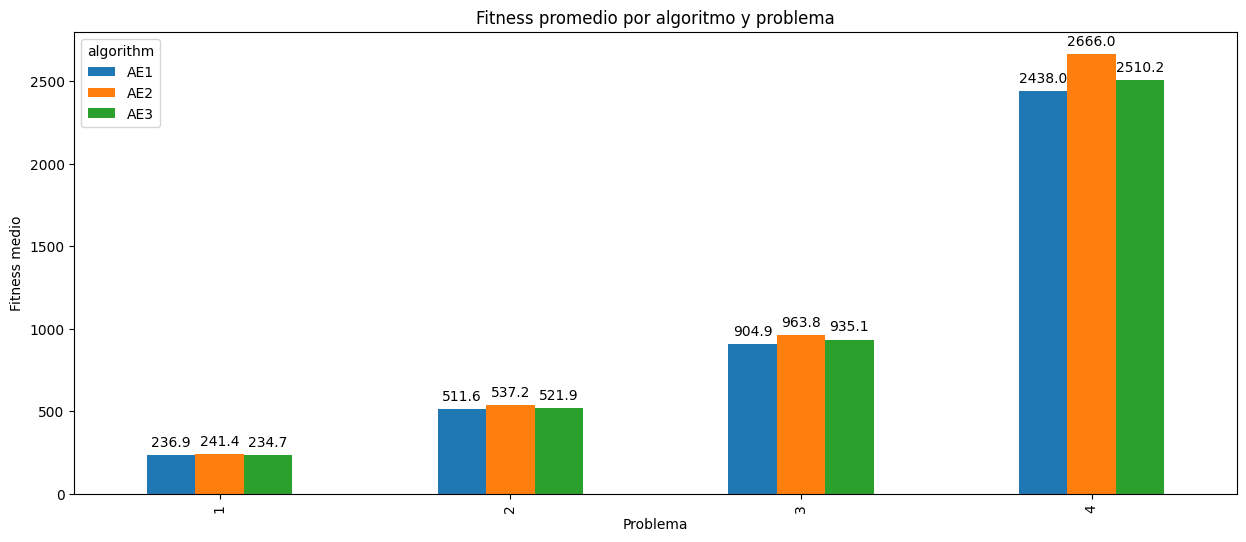

<Figure size 640x480 with 0 Axes>

In [23]:
# Show results_df in a grouped bar plot grouped by problem
results_df_grouped = results_df.groupby(['problem', 'algorithm']).mean().reset_index()
results_df_grouped['mean'] = -results_df_grouped['mean']

fig, ax = plt.subplots(figsize=(15, 6))
pivot_table = results_df_grouped.pivot(index='problem', columns='algorithm', values='mean')
pivot_table.plot(kind='bar', ax=ax)

# Add mean value above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Fitness promedio por algoritmo y problema')
plt.ylabel('Fitness medio')
plt.xlabel('Problema')
plt.show()

plt.savefig(os.path.join(results_dir, 'cbio_p9_fitness.png'))

### 4.4. Visualización de la evolución del algoritmo

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_0.png


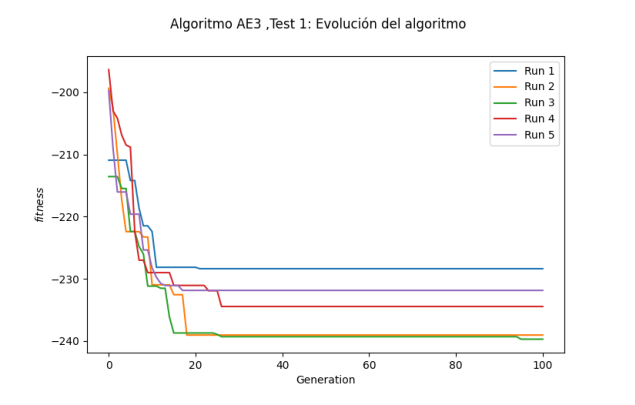

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_1.png


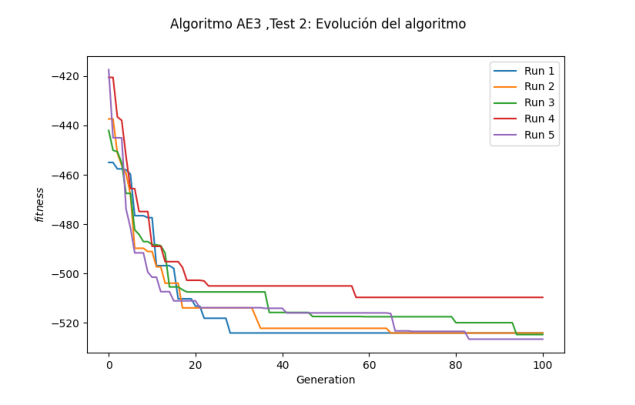

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_2.png


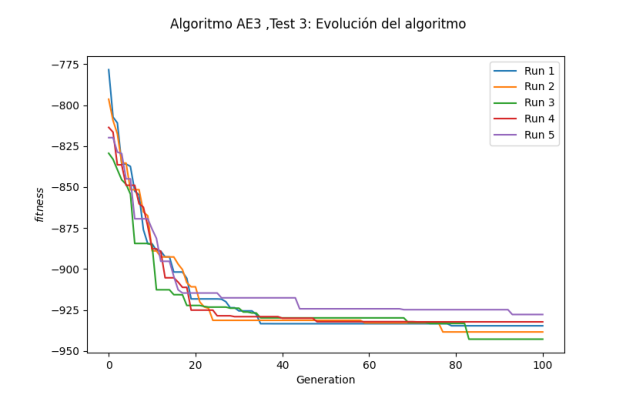

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_3.png


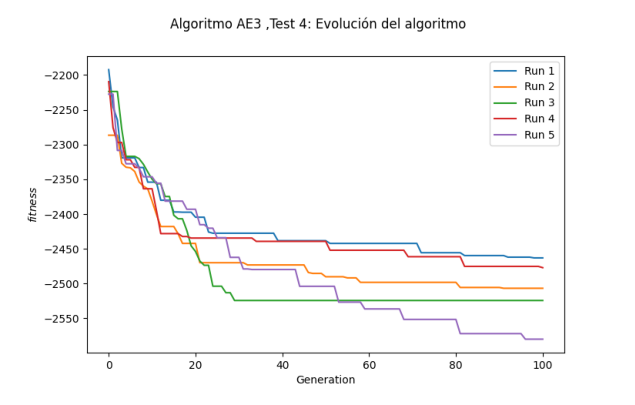

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_0.png


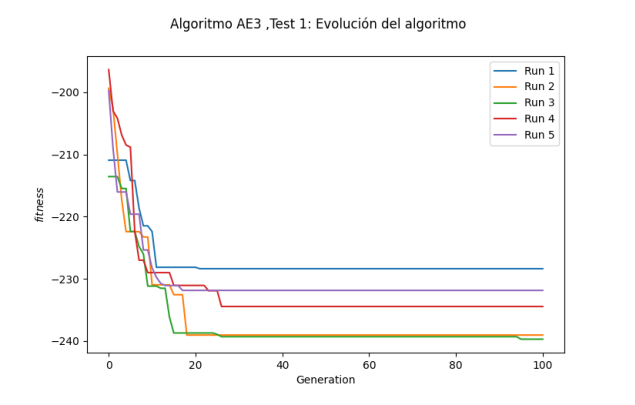

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_1.png


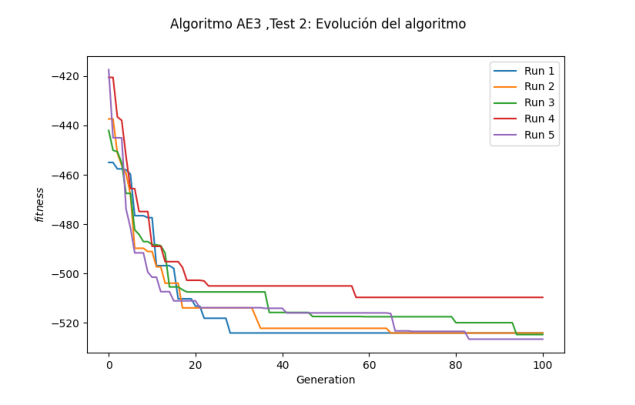

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_2.png


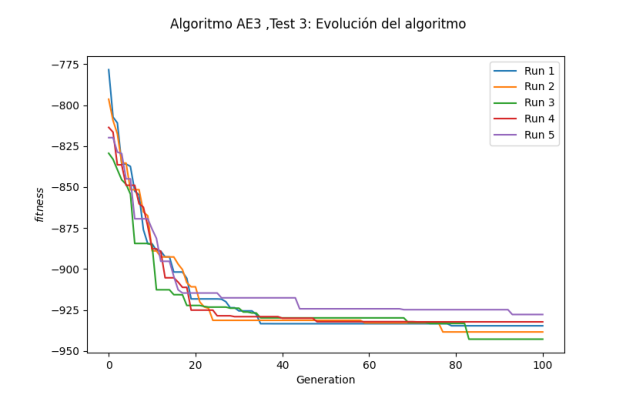

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_3.png


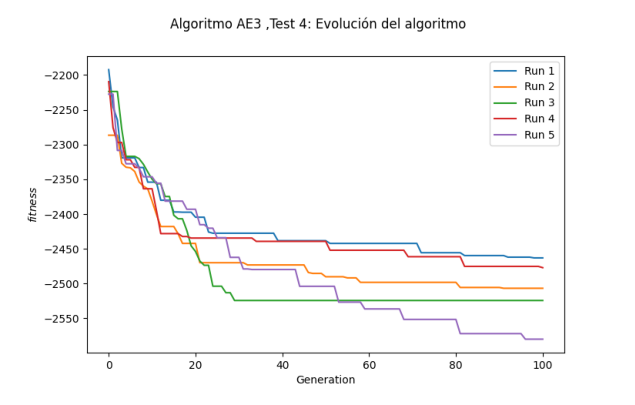

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_0.png


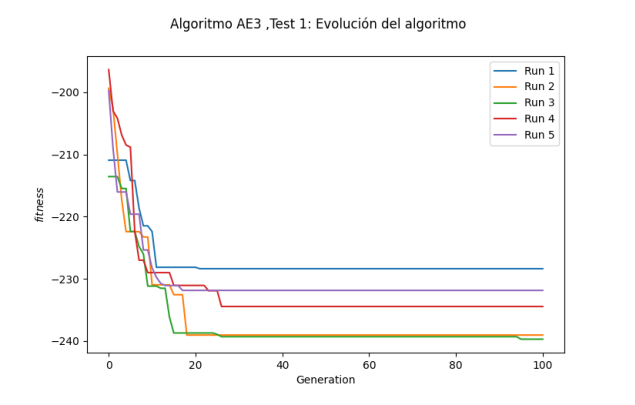

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_1.png


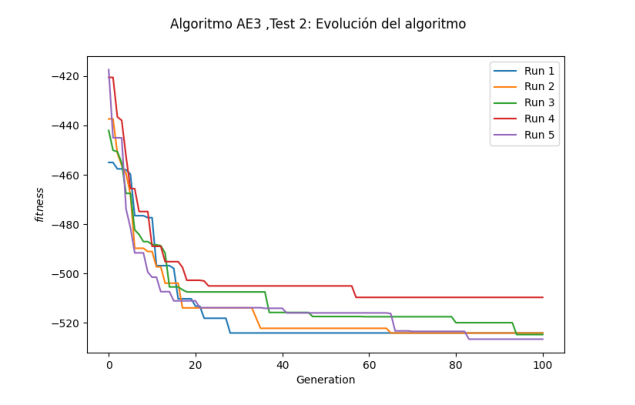

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_2.png


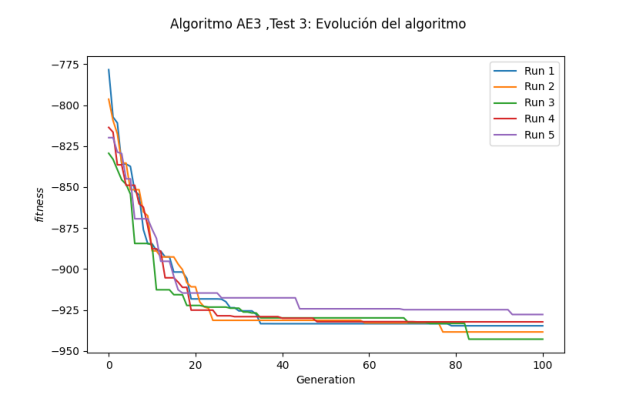

Showing: cbio_p9_results_profiling/EvolutionMuLambdaObjective_3.png


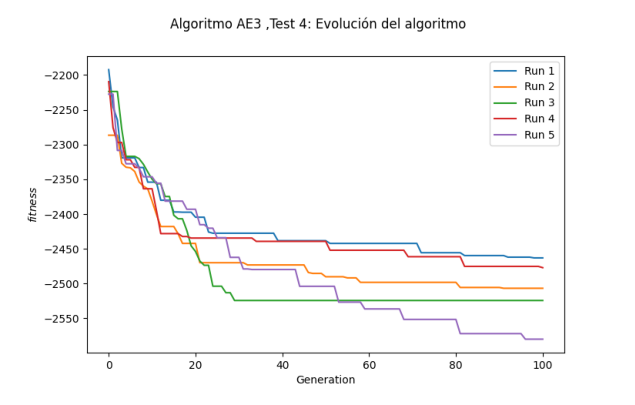

In [24]:
def VisualizaEvolucion(outputs, ylabels, title="Algorithm Evolution", file_prefix=None):
    """
    Muestra una única gráfica con todas las ejecuciones de best_outputs en distintos colores.
    
    Parámetros:
    - best_outputs: np.array de listas con la evolución del fitness en cada run.
    - ylabel: Etiqueta para el eje Y.
    - file_prefix: Prefijo del archivo si se desea guardar la figura.
    """
    
    fig, axes = plt.subplots(nrows=1, ncols = len(outputs), figsize=(8*len(outputs), 5))
    fig.suptitle(title)  # Título común para ambas gráficas
    
    if len(outputs) == 1:
        axes = [axes]
    
    for i, output in enumerate(outputs):
        for j in range(output.shape[0]):
            axes[i].plot(output[j], label=f"Run {j+1}")
            axes[i].set_xlabel("Generation")
            axes[i].set_ylabel(ylabels[i])
            axes[i].legend()
    
    plt.xlabel("Generation")
    plt.legend()
    
    if file_prefix is not None:
        file_path = f"{file_prefix}.png"
        plt.savefig(file_path)
        print(f"Saved: {file_path}")
    
    plt.show()

if not done:
    for nalgorithm, name in enumerate(algorithm_names):
        for nproblem in range(len(problems)):
            outputs = [best_outputs_f[nalgorithm, nproblem, :]]
            if nalgorithm == 0:
                outputs.append(best_outputs_g[nalgorithm, nproblem, :])
            VisualizaEvolucion(outputs, 
                               ["$fitness$", "$maxg$"], 
                               f"Algoritmo {name} ,Test {nproblem+1}: Evolución del algoritmo", 
                               os.path.join(results_dir, f"EvolutionMuLambdaObjective_{nproblem}"))  
else:
    for nalgorithm, name in enumerate(algorithm_names):
        for nproblem in range(len(problems)):
            file_path = os.path.join(results_dir, f"EvolutionMuLambdaObjective_{nproblem}.png")
            print(f"Showing: {file_path}")
            plt.figure(figsize=(15, 5))
            plt.imshow(plt.imread(file_path))            
            plt.axis('off')
            plt.show()

### 4.5. Solución de cada problema

Si $K=1$ y suponemos $s_1 \le \cdots \le s_n$, se tiene que existe una solución óptima al problema de la forma:

$$x_i = \begin{cases}
    1 & \text{, si } i \le p \lor i \ge n-m+p+1 \\
    0 & \text{, en otro caso}
\end{cases}$$

para algún $p$ con $ \lfloor m/2 \rfloor \le p \le \lceil m/2 \rceil$. Por tanto, a lo sumo hay que comprobar 2 posibles soluciones.

In [38]:
# Obtiene la solución de cada problema
def solve(problem):
    perm = np.argsort(problem.X[:,0]) # Sort X and get the permutation
    perm = np.argsort(perm) # invert permutation
    sol = np.zeros(problem.n, dtype=int)
    minf = 0
    for i in range(problem.m//2, (problem.m+1)//2+1):
        x = np.zeros(problem.n, dtype=int)
        x[:i] = 1
        x[problem.n-problem.m+i:] = 1
        x = x[perm] # Apply inverse permutation to x
        f = problem.f(x)
        if f < minf:
            minf = f
            sol = x
    return minf, sol

solutions = [solve(problem) for problem in problems if problem.k == 1]

for i, (f, sol) in enumerate(solutions):
    print("PROBLEMA ", i+1)
    print("Valor objetivo: ", f)
    print("Valor obtenido: ")
    for j in range(len(algorithm_names)):
        print("\t", algorithm_names[j], np.min(best_fitness[j, i, :]))
        best_individuo_index = int(np.argmin(best_fitness[j, i, :]))
        print(best_individuos[j, i, best_individuo_index])
    print("Solución: ", sol)

PROBLEMA  1
Valor objetivo:  -241.4837093035511
Valor obtenido: 
	 AE1 -238.5641516621546
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
	 AE2 -241.4837093035511
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
	 AE3 -239.7229817330029
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Solución:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
PROBLEMA  2
Valor objetivo:  -537

## 5. Test estadísticos

### Descripción

<font size="4"> Comparación de algoritmos para minimización/maximización utilizando test estadísticos.
    
### Componentes
    
- <font size="3"> Se requiere un fichero csv separado para cada problema. En cada fichero csv, las columnas representan los algoritmos a comparar y las filas son las muestras de los resultados. Las cabeceras de todos los ficheros csv deben ser las mismas.
    
- <font size="3"> Se calculan ranking wins - loss para los siguientes test estadísticos:

    - <font size="3"> Mann-Whitney U test (Wilconxon rank-sum test), apropiado para la comparación  de algoritmos probabilistas ejecutados múltiples veces con distintas semillas (muestras independientes).

- <font size="3"> Se calcula también el ranking wins - loss de los resultados medios. 
    
---

### Definición del tipo de test (maximización o minimización)

In [26]:
def mejor(x,y):
#    return x>y # maximización
    return x<y # minimización

def peor(x,y):
#    return x<y # maximización
    return x>y # minimización

### Definición de la clase Ranking

In [27]:
class Ranking:
    def __init__(self, name):
        self.name = name # Nombre del algoritmo
        self.wins = 0 # Veces que ha ganado
        self.losses = 0 # Veces que ha perdido
    def __lt__(self,x):
        return (self.wins-self.losses) < (x.wins-x.losses)
    def __str__(self):
        return f"{self.name:<15} {self.wins:>10} {self.losses:>10} {self.wins - self.losses:>15}"

### Calcula la matriz de wins - losses de las medias a partir de los scores de un problema

In [28]:
def CalculateWinsLossesMatrixMean(scores):
    labels = scores.columns.values
    nScores = len(labels)
    WinLossMatriz = np.zeros((nScores,nScores)) 
    for i in range(nScores-1):            
        score_i = scores.iloc[:,i].values
        for j in range(i+1,nScores):
            score_j = scores.iloc[:,j].values
            if mejor(mean(score_i),mean(score_j)):
                WinLossMatriz[i,j] = 1
                WinLossMatriz[j,i] = -1
            if peor(mean(score_i),mean(score_j)):
                WinLossMatriz[i,j] = -1
                WinLossMatriz[j,i] = 1
    return WinLossMatriz

### Calcula las veces que cada algoritmo ha ganado y ha perdido a partir de la matriz de wins - losses de un problema

In [29]:
def CalculateWinsLossesAmount(WinsLossesMatriz,labels):
    nScores = len(labels)
    WinsLossesAmount = [Ranking(scoreName) for scoreName in labels]
    for i in range(nScores-1):            
        for j in range(i+1,nScores):
            if WinsLossesMatriz[i,j]==1:            
                WinsLossesAmount[i].wins += 1
                WinsLossesAmount[j].losses += 1
            if WinsLossesMatriz[i,j]==-1:            
                WinsLossesAmount[j].wins += 1
                WinsLossesAmount[i].losses += 1
    return WinsLossesAmount

### Acumula las cantidades de wins - losses de un problema

In [30]:
def AddWinsLossesAmount(WinsLossesTotalAmount,WinsLossesAmount):
    for i in range(len(WinsLossesAmount)):
        WinsLossesTotalAmount[i].wins += WinsLossesAmount[i].wins
        WinsLossesTotalAmount[i].losses += WinsLossesAmount[i].losses

### Calcula la matriz de wins - losses de las diferencias estadísticamente significativas para un test estadistico dado, junto con la matriz de p-values, a partir de los scores de un problema

In [31]:
def CalculateWinsLossesMatrixStat(scores,stat):
    labels = scores.columns.values
    nScores = len(labels)
    WinLossMatriz = np.zeros((nScores,nScores)) 
    pValues = np.zeros((nScores,nScores)) 
    for i in range(nScores-1):            
        score_i = scores.iloc[:,i].values
        for j in range(i+1,nScores):
            score_j = scores.iloc[:,j].values
            if not all(x_i == y_i for x_i, y_i in zip(score_i, score_j)): # si son datos diferentes
                _, p_value = stat(score_i, score_j)  
                pValues[i,j] = p_value
                pValues[j,i] = p_value                
                if p_value<0.05:
                    if mejor(mean(score_i),mean(score_j)):
                        WinLossMatriz[i,j] = 1
                        WinLossMatriz[j,i] = -1                        
                    if peor(mean(score_i),mean(score_j)):
                        WinLossMatriz[i,j] = -1
                        WinLossMatriz[j,i] = 1                        
    return WinLossMatriz,pValues

### Impresión de la matriz wins - losses

In [32]:
def PrintMatriz(WinLossMatriz,labels):
    print("win: El algoritmo en la columna gana al algoritmo de la fila")
    print("loss: El algoritmo en la columna pierde frente al algoritmo de la fila")
    print("tie: El algoritmo en la columna empata con al algoritmo de la fila")
    n = len(labels)
    col_width = 10  # Ancho fijo para cada columna
    # Imprimir encabezados de columna
    print(" " * col_width, end="")
    for j in range(n):
        print(f"{labels[j]:>{col_width}}", end="")
    print()
    for i in range(n):
        print(f"{labels[i]:<{col_width}}", end="")
        for j in range(n):
            if i == j:
                print(f"{'-':>{col_width}}", end="")
            elif WinLossMatriz[j,i] == 1:
                print(f"{'win':>{col_width}}", end="")
            elif WinLossMatriz[j,i] == -1:
                print(f"{'loss':>{col_width}}", end="")
            else:
                print(f"{'tie':>{col_width}}", end="")
        print()

### Impresión  del ranking wins - losses

In [33]:
def PrintRanking(WinLoss):
    Ranking = sorted(WinLoss, reverse=True)    
    print(f"{'Ranking':<15} {'Wins':>10} {'Losses':>10} {'Wins-Losses':>15}")
    for r in Ranking:
        print(r)

### Impresión de la matriz de p-values

In [34]:
def PrintPValuesMatriz(pValues, labels):
    n = len(labels)
    col_width = 15  # Ancho fijo para cada columna, ajusta según sea necesario
    print("p-values")
    # Imprimir encabezados de columna
    print(" " * col_width, end="")
    for j in range(n):
        print(f"{labels[j]:>{col_width}}", end="")
    print()

    # Imprimir filas con datos
    for i in range(n):
        print(f"{labels[i]:<{col_width}}", end="")
        for j in range(n):
            if i == j:
                print(f"{'-':>{col_width}}", end="")
            else:
                print(f"{pValues[i,j]:>{col_width}.8f}", end="")
        print()

### Realización de los test estadísticos e impresión de resultados

In [35]:
#fileName = ["lymphoma_11classes-results","micro-mass-results","GCM-results"] # todas deben tener las mismas cabeceras de algoritmos
# En este ejemplo son sklearn.ensemble.RandomForestClassifier, sklearn.svm.SVC y sklearn.neural_network.MLPClassifier 

#scores = pd.read_csv(fileName[0]+".csv") # Se coje el primero de ellos para crear los objetos de la clase Ranking

labels = algorithm_names 

for i in range(len(problems)):

    print(f"TESTS ESTADÍSTICOS PROBLEMA {i+1}\n")
    WinsLossesTotalAmountMean = [Ranking(scoreName) for scoreName in algorithm_names]
    WinsLossesTotalAmountRanksum = [Ranking(scoreName) for scoreName in algorithm_names]
    
    scores = pd.DataFrame(columns=algorithm_names, data=np.array([best_fitness[nalgorithm, i, :] for nalgorithm in range(len(algorithm_names))]).T)
    print(scores)
    print('\n')
    
    # WINS-LOSSES DE MEDIAS
    # Matriz de dos dimensiones con valores -1, 0, 1 para comparar los algoritmos en cada problema
    WinsLossesMatrizMean = CalculateWinsLossesMatrixMean(scores) 
    # Lista con los objetos Ranking de cada algoritmo 
    WinsLossesAmountMean = CalculateWinsLossesAmount(WinsLossesMatrizMean,labels)
    # Acumula los wins-loss de los algoritmos en todos los problemas
    AddWinsLossesAmount(WinsLossesTotalAmountMean,WinsLossesAmountMean)
    print("Mean")
    PrintMatriz(WinsLossesMatrizMean,labels)
    PrintRanking(WinsLossesAmountMean)
    print('\n')
  
    # WINS-LOSSES Y P-VALUES DE RANK-SUM
    # Matriz de dos dimensiones con valores -1, 0, 1 para comparar los algoritmos en cada problema
    # y matriz de dos dimensiones para los p-values
    WinsLossesMatrizRanksum, pValuesRanksum = CalculateWinsLossesMatrixStat(scores,mannwhitneyu)
    # Lista con los objetos Ranking de cada algoritmo 
    WinsLossesAmountRanksum = CalculateWinsLossesAmount(WinsLossesMatrizRanksum,labels)
    # Acumula los wins-loss de los algoritmos en todos los problemas
    AddWinsLossesAmount(WinsLossesTotalAmountRanksum,WinsLossesAmountRanksum)
    print("Ranksum")    
    PrintMatriz(WinsLossesMatrizRanksum,labels)
    PrintPValuesMatriz(pValuesRanksum, labels)    
    PrintRanking(WinsLossesAmountRanksum)
    print('\n')
    
        
print("Total Mean")
PrintRanking(WinsLossesTotalAmountMean)
print('\n')

print("Total Ranksum")
PrintRanking(WinsLossesTotalAmountRanksum)
print('\n')

TESTS ESTADÍSTICOS PROBLEMA 1

          AE1         AE2         AE3
0 -237.403184 -241.483709 -228.379515
1 -238.564152 -241.483709 -239.060080
2 -238.348134 -241.293771 -239.722982
3 -237.121671 -241.483709 -234.464886
4 -232.909354 -241.483709 -231.873648


Mean
win: El algoritmo en la columna gana al algoritmo de la fila
loss: El algoritmo en la columna pierde frente al algoritmo de la fila
tie: El algoritmo en la columna empata con al algoritmo de la fila
                 AE1       AE2       AE3
AE1                -       win      loss
AE2             loss         -      loss
AE3              win       win         -
Ranking               Wins     Losses     Wins-Losses
AE2                      2          0               2
AE1                      1          1               0
AE3                      0          2              -2


Ranksum
win: El algoritmo en la columna gana al algoritmo de la fila
loss: El algoritmo en la columna pierde frente al algoritmo de la fila
tie: El algor